In [33]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import constants as const
import import_ipynb

In [34]:
from LithiumScatteringLengths import *

## Equations 2D

In [38]:
m_Li6=6*1.67377e-27
def k_F(n):
    return np.sqrt(4*np.pi*n)
def E_F(n):
    return const.hbar**2 * k_F(n)**2 / (2*m_Li6)
def T_F(n):
    return E_F(n)/const.k

Interaction parameters:

In [39]:
# The effective 2D scattering length depends on the harmonic oscillator length
def harmonic_osc_length(omega,m):
    return np.sqrt(const.hbar/(m*omega))
def a_2D(a_3D,l_z):
    A = 0.905
    return l_z*np.sqrt(np.pi/A)*np.exp(-np.sqrt(np.pi/2)* l_z/a_3D)
def g_2D(k_F,a_2D):
    # Applicable in the whole crossover, see Niclas thesis p.15ff
    return -const.hbar**2/m_Li*2*np.pi/(np.log(kF*a2D))

def g_2D_weak_limit(a_3D,aho2d,m):
    # Applicable for |a_3D| << l_z, see Niclas' thesis p.16ff
    return np.sqrt(8*np.pi)*const.hbar**2*a_3D/(m*aho2d)
def g_tilde_weak_limit(a_3D,aho2D):
    # Applicable for |a_3D| << l_z, see Niclas' thesis p.16ff
    return np.sqrt(8*np.pi)*a_3D/(aho2D) 

In [37]:
a_0 = const.value('Bohr radius')
pi = np.pi
a_750G = a12[B==750][0] * a_0
l_z_F = harmonic_osc_length(2*pi*9e3,m_Li6)
l_z_D = harmonic_osc_length(2*pi*11e3,2*m_Li6)
g_2D_F = g_tilde_weak_limit(a_750G,l_z_F)
critical_PSD_dimer = np.log(380/g_2D_F) #=n_Dimer * lambda_{T,dimer} = n_Fermions * lambda_{T,Fermions}/2 (m_D = 2*m_F)
TC_over_TF = 1/critical_PSD_dimer/2 # see above comment and Niclas' thesis p.19 footnote 13

In [274]:
np.sqrt((2*E_F(2e12))/m_Li6)

0.05264402189350715

In [15]:
a_750G = a12[B==810][0] 
a_750G

17148.3

2.0085239999999998e-26

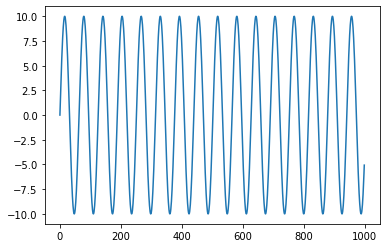

In [27]:
xx=np.linspace(0,10,1000)
plt.plot(10*np.sin(10*xx))

In [29]:
np.pi*(60E-6)**2*90

1017876.019763093

In [262]:
# Alternative way by using the g_Tilde from the fermions
g_2D_D = g_tilde_weak_limit(a_750G,l_z_D)
critical_PSD_dimer_alt = np.log(380/g_2D_D) #=n_Dimer * lambda_{T,dimer} = n_Fermions * lambda_{T,Fermions}/2 (m_D = 2*m_F)
TC_over_TF_alt1 = 1/critical_PSD_dimer_alt/2 # see above comment and Niclas' thesis p.19 footnote 13
# The influence of g tilde differing by a factor of ~1.4 on the cricital PSD is only minor because it has a logarithmic dependency

In [263]:
g_2D_F

2.1643599801778475

In [237]:
# 2nd alternative approach: Directly use equation 3.14 in Niclas' thesis to calculate TC/TF
a_2D_750G = a_2D(a_750G, l_z_F)
k_F_750G = k_F(1e12) # usual density in our experiment
TC_over_TF_alt2 = 1/2*(np.log(380/(4*pi)*np.log(4*pi/(k_F_750G**2*a_2D_750G**2))))**(-1) #very weak dependence on k_F (or density)

In [238]:
ln_kF_a2D = np.log(k_F_750G*a_2D_750G)

In [239]:
mf_shift = g_2D_D*const.hbar**2/(2*m_Li6)*0.8e12/const.h
kF_a3D_inv=1/(a_750G*k_F(0.8e12))

In [240]:
#Calcualte healing length
mu = g_2D_D * const.hbar**2/(m_Li6*2) * 0.01e12
xi = np.sqrt(const.hbar**2/(2*2*m_Li6*mu))

In [40]:
def EB_3D(a3D):
    tmp = const.hbar**2/(m_Li6*a3D**2)
    if hasattr(a3D, "__len__"):
        tmp[a3D<=0] = 0
    else:
        if a3D<=0:
            tmp=0
    return tmp
def EB_2D(a2D):
    # Ideal 2D, not quasi 2D (will transform into 3D scattering length in the BEC regime)
    return const.hbar**2/(m_Li6*a2D**2)

In [41]:
def g_2D_weak_limit(a,m,aho2d):
    return np.sqrt(8*np.pi)*const.hbar**2*a/(m*aho2d)

def g_tilde_weak_limit(a,m,aho2D):
    return m*g_2D_weak_limit(a,m,aho2D)/const.hbar**2

def de_broglie(T,m):
    return np.sqrt(2*np.pi*const.hbar**2/(m*const.kB*T))

def TF_Fermi_2D_ideal(N,l_ho):
    # https://iopscience.iop.org/article/10.1088/1367-2630/13/11/113032/pdf
    return(4*N**(1/4)*l_ho)

def RMS_BEC_limit(N,l_ho,eta):
    # https://iopscience.iop.org/article/10.1088/1367-2630/13/11/113032/pdf
    # Eq. 17
    # eta = ln(k_F a_2D)
    alpha_m = 0.6
    return TF_Fermi_2D_ideal(N,l_ho)/np.sqrt(3)/(2*np.log(2*np.pi/alpha_m) - 4*eta)**(1/4)

def RMS_BCS_limit(N,l_ho,eta):
    # https://iopscience.iop.org/article/10.1088/1367-2630/13/11/113032/pdf
    # Eq. 18
    # eta = ln(k_F a_2D)
    return TF_Fermi_2D_ideal(N,l_ho)/np.sqrt(3) * np.sqrt((2*eta)/(2*eta +1))


In [42]:
# Thomas Fermi profile
print('a_2D=',a_2D_750G)
lr = harmonic_osc_length(2*np.pi*10,m_Li6)
print('Harmonic osc=',lr)
N = 8e3
TF_2D_noninteracting = TF_Fermi_2D_ideal(N,lr)
print('Non interacting',TF_2D_noninteracting)
TF_2D_interacting = RMS_BEC_limit(N,lr,-2)
print('RMS radius',TF_2D_interacting)        

NameError: name 'a_2D_750G' is not defined

In [284]:
print(E_F(1e12)/const.h)

10500.963071849344


In [285]:
1/10500

9.523809523809524e-05

In [245]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [246]:
# Calculate 3D density with 1kHz 
pi = np.pi
az = harmonic_osc_length(2*pi*1e3,m_Li6)
print('az',az)
n2D = 0.7e12
n3D = n2D/(np.sqrt(pi)*az)
print('n3D',n3D)

az 1.2927800199996428e-06
n3D 3.0549103666031174e+17


In [247]:
rtf = R_TF(3e3*0.37*const.h,mLi,2*np.pi*100)
8e3/(pi*rtf**2)*1e-12

NameError: name 'R_TF' is not defined

## 750G 2D

In [248]:
a0 = const.value('Bohr radius')
a750 = a12[B==750][0] * a0

In [249]:
k_F(0.2e12)

1585330.9190424043

In [250]:
lz=harmonic_osc_length(2*np.pi*9e3,m_Li6)
lz
a750_2D = a2D(a750,lz)
a750_2D
print('Ratio lz/a_3D=',-lz/a750) #Far in the BEC limit -> we can use the 3D binding energy at 750G
EB = EB_3D(a750)
EB/const.h
n = 1e12;
lnkFa2D = np.log(kF(n)*a750_2D)
print('lnkFa2D',lnkFa2D)
g = g_tilde_weak_limit(a750_2D,mLi,lz)
print('g',g)
g2D = g_2D(kF(1e12),a750_2D)
print('g2D',g2D)

4.3092667333321425e-07

NameError: name 'a2D' is not defined

In [251]:
EF_750 = EF(n)
print('E_B=',EB/const.h,'kHz')
print('EF=',EF_750/const.h,'kHz')
print('E_B/E_F=', EB/EF_750)

NameError: name 'EF' is not defined

Phase boundaries from Sheehy paper Eq. 19 (also see Eq. 18)

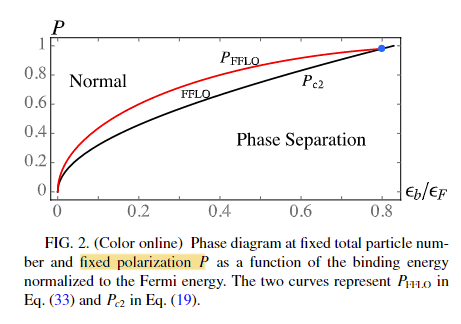

In [252]:
def PC2(EBoverEF):
    if EBoverEF >= np.sqrt(2)/(np.sqrt(2) + 1):
        return 1
    else:
        return 0.5*EBoverEF*np.sqrt(1+4*EBoverEF)
def Gap_2D_over_EF(EBoverEF):
    # Equation (13a)
    return np.sqrt(2*EBoverEF)
    
def Mu_2D_over_EF(EBoverEF):
    # Equation (13b)
    return 1-0.5*EBoverEF;

In [253]:
Gap_2D_over_EF_plot = Gap_2D_over_EF(EB_quasi2D/EF_750)
Mu_2D_over_EF_plot = Mu_2D_over_EF(EB_quasi2D/EF_750)
plt.figure()
plt.plot(B_plot,Gap_2D_over_EF_plot,label='Gap')
plt.plot(B_plot,Mu_2D_over_EF_plot,label='mu')
plt.legend()

NameError: name 'EF_750' is not defined

In [254]:
PC2(E_B/EF_750)

NameError: name 'E_B' is not defined

In [255]:
# It should always be phase seperation!

In [66]:
np.sqrt(2)/(np.sqrt(2) + 1)

0.5857864376269051

In [67]:
#At unitarity E_B = 0.244 hbar omega. What is the expected PC?
print('Ratio at unitarity=',0.244*const.h*fz/EF_750)
PC2(0.244*const.h*fz/EF_750)

NameError: name 'EF_750' is not defined

In [68]:
# Plot mu and gap in 2D


In [69]:
EB/EF_750

NameError: name 'EB' is not defined

## Binding Energy 2D/3D

<Figure size 432x288 with 0 Axes>

(-50000.0, 1000.0)

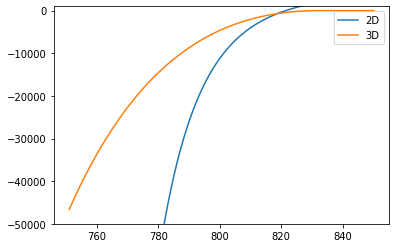

In [115]:
fz = 9e3; omega_z = 2*np.pi*fz;
lz=harmonic_osc_length(omega_z,m_Li6)
plt.figure()
indx=(750,850)
a_plot = a12[indx[0]:indx[1]] * a_0
B_plot = B[indx[0]:indx[1]]
a2D_plot = a_2D(a_plot,lz)
EB_2D_plot = EB_2D(a2D_plot)
EB_3D_plot = EB_3D(a_plot)
plt.plot(B_plot,-EB_2D_plot/const.h + fz/2,label='2D')
plt.plot(B_plot,-EB_3D_plot/const.h,label='3D')
#plt.plot(B_plot,-EB_quasi2D/const.h + + fz/2,label='quasi 2D')
plt.ylim(-50e3,1e3)
plt.legend()

In [116]:
-EB_2D_plot[0]/const.h+ fz/2 

-774944.259399914

<Figure size 432x288 with 0 Axes>

(-30000.0, 10000.0)

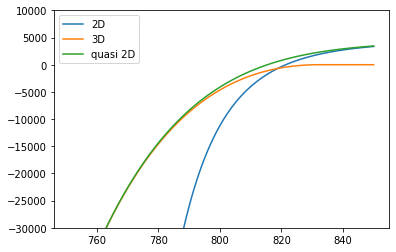

In [121]:
fz = 9e3; omega_z = 2*np.pi*fz;
lz=harmonic_osc_length(omega_z,m_Li6)
plt.figure()
indx=(750,850)
a_plot = a12[indx[0]:indx[1]] * a_0
B_plot = B[indx[0]:indx[1]]
a2D_plot = a_2D(a_plot,lz)
EB_2D_plot = EB_2D(a2D_plot)
EB_3D_plot = EB_3D(a_plot)
plt.plot(B_plot,-EB_2D_plot/const.h + fz/2,label='2D')
plt.plot(B_plot,-EB_3D_plot/const.h,label='3D')
plt.plot(B_plot,-EB_quasi2D/const.h + + fz/2,label='quasi 2D')
plt.ylim(-30e3,10e3)
plt.legend()

In [118]:
from scipy.optimize import fsolve
import scipy.integrate as integrate
def integrand(u,x):
    # x is a parameter
    return (1-np.exp(-x*u)/np.sqrt((1-np.exp(-2*u))/(2*u)))/np.sqrt(4*np.pi*u**3);

def F_int(x):
    return integrate.quad(integrand, 1e-6,np.Inf,args=(x,))[0]

def func(x, *args):
    # args[0]: lz/a3D
    # args[1]: hbar omega_z
    lz_over_a3D, hbar_omega_z = args;
    return lz_over_a3D - F_int(x /hbar_omega_z);

EB_quasi2D = np.zeros(np.shape(a_plot))
for ii,a_ii in enumerate(a_plot):
    root = fsolve(func,[1e3*const.h],args=(lz/a_ii,const.h*fz))
    EB_quasi2D[ii] = root[0]

/var/folders/5b/th6q89l10jv5c2rk4cf_3d7h0000gq/T/ipykernel_21659/3424817812.py:8: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return integrate.quad(integrand, 1e-6,np.Inf,args=(x,))[0]


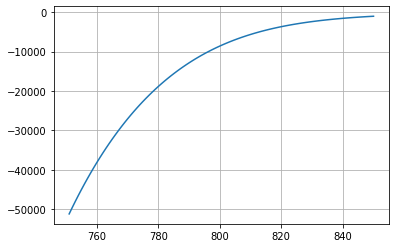

In [119]:
plt.plot(B_plot,-EB_quasi2D/const.h)
plt.grid()

10500.963071849344

<Figure size 432x288 with 0 Axes>

(-10000.0, 5000.0)

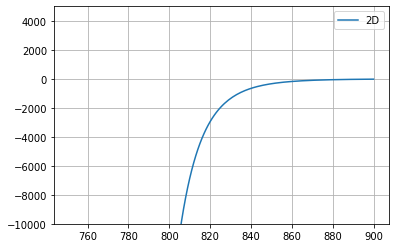

In [151]:
fz = 4e3; omega_z = 2*np.pi*fz;
lz=harmonic_osc_length(omega_z,m_Li6)
plt.figure()
indx=(750,900)
a_plot = a12[indx[0]:indx[1]] * a_0
B_plot = B[indx[0]:indx[1]]
a2D_plot = a_2D(a_plot,lz)
EB_2D_plot = EB_2D(a2D_plot)
plt.plot(B_plot,-EB_2D_plot/const.h,label='2D')
plt.ylim(-10e3,5e3)
plt.grid()
plt.legend()

In [152]:
np.sqrt(2*EB_2D(a2D_plot[-1])*E_F(1e12))/const.h

680.4414150064468

In [159]:
a12[900]

-7650.5

In [153]:
#critical temperature

In [154]:
2*np.exp(0.57)/(np.pi*a2D_plot[-1]*k_F(1e12))

0.03647200089134152

In [164]:
yy=np.linspace(0,20000)
xx=2*pi*yy
lz2=harmonic_osc_length(xx,m_Li6)

/var/folders/5b/th6q89l10jv5c2rk4cf_3d7h0000gq/T/ipykernel_21659/2070377268.py:3: RuntimeWarning: divide by zero encountered in true_divide
  return np.sqrt(const.hbar/(m*omega))


/var/folders/5b/th6q89l10jv5c2rk4cf_3d7h0000gq/T/ipykernel_21659/1146948356.py:3: RuntimeWarning: divide by zero encountered in true_divide
  Tcq2=(1+(E_F(nn)/(const.hbar*xx))*(np.log(1.74)))*2*np.exp(0.57)/(np.pi*a_2D(a12[900]*a0,lz2)*k_F(nn))
/var/folders/5b/th6q89l10jv5c2rk4cf_3d7h0000gq/T/ipykernel_21659/1146948356.py:3: RuntimeWarning: invalid value encountered in true_divide
  Tcq2=(1+(E_F(nn)/(const.hbar*xx))*(np.log(1.74)))*2*np.exp(0.57)/(np.pi*a_2D(a12[900]*a0,lz2)*k_F(nn))


Text(0.5, 0, 'EF/wz')

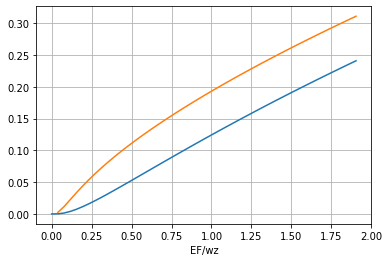

In [228]:
nn=1e12
Tc=2*np.exp(0.57)/(np.pi*a_2D(a12[900]*a0,lz2)*k_F(nn))
Tcq2=(1+(E_F(nn)/(const.hbar*xx))*(np.log(1.74)))*2*np.exp(0.57)/(np.pi*a_2D(a12[900]*a0,lz2)*k_F(nn))
plt.plot(yy/10500,Tc)
plt.plot(yy/10500,Tcq2)
plt.xlabel("EF/wz")
plt.grid()

(0.0, 4.0)

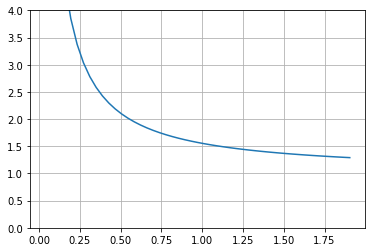

In [225]:
plt.plot(yy/10500,Tcq2/Tc)
plt.ylim(0,4)
plt.grid()

In [226]:
E_F(nn)/const.h

10500.963071849344

In [223]:
np.log((7+4*np.sqrt(3))/8)

0.5544742521697975

## Unitarity 3D Density

See Zwierlein Thesis Chapter 5.3.1 (p.121)

In [26]:
bertsch=0.37
pi = np.pi
def R_TF(mu,mass,omega):
    return np.sqrt(2*mu/(mass * omega**2))
def mu_unitarity(E_F):
    return bertsch*E_F
def EF_3D(n):
    #sping density, not total density!
    return const.hbar**2/(2*mLi)*(3*pi**2*n)**(2/3)
def EF_3D_harmonic(omega,N):
    #N: number of atoms for of one spin
    return const.hbar*omega*(6*N)**(1/3)

In [35]:
# Calculate 3D peak density with 1kHz vertical confinement
u_n_2D = 0.8e12
u_omega_z = 2*pi*1e3
u_EF = ((6*pi**2*u_n_2D)**2/(2*mLi)**3*const.hbar**6*(3*pi/8)**2*mLi*u_omega_z**2/2*bertsch**(-1/2))**(1/4)
print('E_F', u_EF/const.h,'Hz')
print('T_F',u_EF/const.k/1e-9,'nK')

E_F 5468.024878416322 Hz
T_F 262.4238052273371 nK
